<a href="https://colab.research.google.com/github/SamiraHabib/Fake_News/blob/main/Fakenildes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Vetorização do texto**

In [2]:
import pandas as pd
import numpy as np

In [3]:
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from unicodedata import normalize
import re

In [4]:
import re
import nltk
from string import punctuation

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [6]:
data_df = pd.read_json('https://raw.githubusercontent.com/SamiraHabib/Fake_News/main/fakeNews%20_temp3.json')

##**Criar coluna de texto corrido**

In [7]:
data_df['review_total'] = ""
for x in range(len(data_df)):
  data_df['review_total'][x] = " ".join([data_df['review_title'][x], data_df['review_resume'][x],
                                         data_df['review_conclusion'][x]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##**Spacy**

SAPCY en_core_web_trf: Large and acuratte english pipeline optimized for CPU about WEB written text (blogs, news, comments). English Vocabulary, syntax, entities and vectors

Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer. 

In [8]:
!pip install spacy
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [9]:
#Amiga aqui eu to fazendo o de-para de nltk pra spacy,
#é a mesma função que eu contrui pro remove_stopword do nltk só que com as chamadas da biblioteca do spacy

**Tirando pontuação e transformando em minúsculo**

In [10]:
df_preprocess = pd.DataFrame()

**Tokenizando as palavras do texto**

In [11]:
### Adicionando pontuação as stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords = list (set(stopwords))
STOPWORDS = stopwords + list (punctuation)

In [12]:
normalized_list = []

for item in data_df['review_total']:
  norm = normalize('NFKD', item).encode('ASCII', 'ignore').decode('ASCII')
  normalized_list.append(norm.lower().replace(',','').replace(':','').replace('?','').replace('"','').replace('\'s','').replace('\'','').replace('!',''))

df_preprocess['normalized'] = normalized_list

In [13]:
df_preprocess

normalized
0     normandy summit results the eu plays on russia...
1     the us benefits from the attack on the saudi o...
2     the polish legions of pilsudski organized the ...
3     the west might use the eastern europeans as ca...
4     the resolution of the european parliament reli...
...                                                 ...
7361  us wants to divide syria the usa wants to divi...
7362  obama was close to succeeding where hitler fai...
7363  european parliament falsifies history about mo...
7364  european parliament falsifies history about mo...
7365  the us is helping terrorists in afghanistan a ...

[7366 rows x 1 columns]

In [14]:
df_preprocess['regex'] = df_preprocess['normalized'].apply(lambda x: re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', '', str(x)))

In [15]:
df_preprocess

normalized                                              regex
0     normandy summit results the eu plays on russia...  normandy summit results the eu plays on russia...
1     the us benefits from the attack on the saudi o...  the us benefits from the attack on the saudi o...
2     the polish legions of pilsudski organized the ...  the polish legions of pilsudski organized the ...
3     the west might use the eastern europeans as ca...  the west might use the eastern europeans as ca...
4     the resolution of the european parliament reli...  the resolution of the european parliament reli...
...                                                 ...                                                ...
7361  us wants to divide syria the usa wants to divi...  us wants to divide syria the usa wants to divi...
7362  obama was close to succeeding where hitler fai...  obama was close to succeeding where hitler fai...
7363  european parliament falsifies history about mo...  european parliament falsifies history about mo...
7364  european parliament falsifies history about mo...  european parliament falsifies history about mo...
7365  the us is helping terrorists in afghanistan a ...  the us is helping terrorists in afghanistan a ...

[7366 rows x 2 columns]

In [16]:
tokenizer = English()

In [17]:
df_preprocess['tokenized'] = df_preprocess.apply(lambda x: tokenizer(x['regex']), axis=1)

In [18]:
df_preprocess['tokenized'][0]

normandy summit results the eu plays on russia side and betrayed kyiv no bright future for ukraine ukraine has put itself in a situation when external forces dictate how it should solve its internal problems kyiv expected that its western allies will put pressure on russia in the normandy four format however the allies realised that their confrontation with russia will cost them more emmanuel macron and angela merkel supported russias position and put even bigger pressure on ukraine than vladimir putin did eventually zelenskyy found himself in solitude because russia germany and france had nearly identical positions regarding the resolution of the civil conflict in ukraine ukrainian politicians wrongfully remain confident that the west will always unconditionally support any russophobic regime and that ukraine can just carry out its foreign policy and security under the wests authority to enjoy its protectionukraine could slam the door and declare that it no longer needs the normandy f

**Criando lista de stopwords e removendo-as do texto**

In [19]:
spacy_stopwords = list(set(spacy.lang.en.stop_words.STOP_WORDS))

In [20]:
words_lists = []

for item in df_preprocess['tokenized']:
  word_temp = []
  for word in item:
    if word.text not in spacy_stopwords:
      word_temp.append(word)
  words_lists.append(word_temp)

df_preprocess['stopwords'] = words_lists

In [21]:
df_preprocess.head()

normalized  ...                                          stopwords
0  normandy summit results the eu plays on russia...  ...  [normandy, summit, results, eu, plays, russia,...
1  the us benefits from the attack on the saudi o...  ...  [benefits, attack, saudi, oil, facility, regar...
2  the polish legions of pilsudski organized the ...  ...  [polish, legions, pilsudski, organized, volyn,...
3  the west might use the eastern europeans as ca...  ...  [west, use, eastern, europeans, cannon, fodder...
4  the resolution of the european parliament reli...  ...  [resolution, european, parliament, relieves, g...

[5 rows x 4 columns]

##Nuvem de palavras com imagem png

Usando o dataframe que contém as palavras normalizadas

In [22]:
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


In [23]:
summary = df_preprocess['normalized'] 

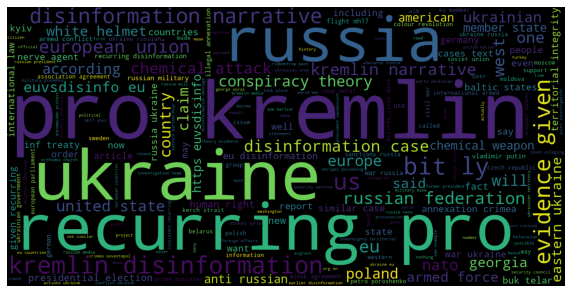

In [24]:

# concatenar as palavras
all_summary = " ".join(s for s in summary)

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

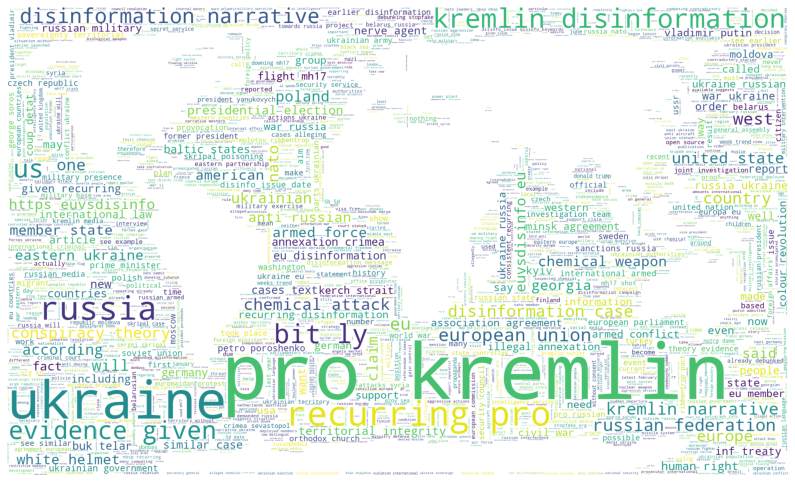

In [45]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("/content/6e197387ee473cf4751e6b285f68ad09.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [ ]:
# fazer o fit no modelo (passo a passo: https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/)

In [46]:
nlp = spacy.load('en_core_web_sm')

In [47]:
words_compr = []

for idx, item in enumerate(df_preprocess['stopwords']):
  words_compr.append(nlp(str(item)))

###Lista de entidade em cada texto

In [ ]:
words_compr[4].ents

In [30]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [31]:
#fit modelo
#transform text

In [32]:
text = df_preprocess['stopwords'].to_string(index=False).replace('\n','').replace(',','')

In [33]:
text

' [normandy summit results eu plays russia... [benefits attack saudi oil facility regar... [polish legions pilsudski organized volyn... [west use eastern europeans cannon fodder... [resolution european parliament relieves g... [tentacles george soros entangle politics... [protests hong kong usfunded growing back... [antisemitism ukraine rise particular conc... [threats kaliningrad stands chance ministr... [western propaganda masters control mass ... [liberalglobalism totalitarian ideology dom... [liberalglobalism totalitarian ideology dom... [sanctions russia unproductive eu sanction... [support nato ukraine falling number peop... [wadas decision russia politically motivat... [foreign aid hinders return syrian refuge... [western media campaign supports preparati... [goal crimea takeover save donbaslike civ... [goal crimea takeover save donbaslike civ... [molotovribbentrop pact pave way outbreak... [red army liberated estonia nazi army wa... [ukrainians paid snitching local corrupt ... 

In [ ]:
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#for itens in df_preprocess['stopwords'].iteritems():
 #   text = itens

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

token_list = []
for token in my_doc:
  token_list.append(token.text)
print(token_list)

###Sentença

In [ ]:
nlp = English()

# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sbd)

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

###STOPWORDS

In [ ]:
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

###SENTENÇA FILTRADA

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

**Classificação gramatical de cada palavra**

In [ ]:
doc = nlp(text)
for token in doc:
  print(token.text, "|", token.lemma_, "|", token.is_alpha, "|", token.is_punct, "|", token.is_digit, "|", token.like_num)

In [ ]:
# POS tagging
nltk.download('averaged_perceptron_tagger')
docs = nlp(text)

tokens = nltk.word_tokenize(text)

classes = nltk.pos_tag(tokens)
print(classes)

#for word in docs:
    #print(word.text,word.pos_)

###PALAVRAS E SEUS VALORES SINTATICOS

In [ ]:
import en_core_web_sm

# load en_core_web_sm of English for vocabluary, syntax & entities
nlp = en_core_web_sm.load()

#  "nlp" Objectis used to create documents with linguistic annotations.
docs = nlp(text)

for word in docs:
    print(word.text,word.pos_)

###ENTIDADES

In [42]:
from spacy import displacy

doc_ent = nlp(text)

entities = [(i.text, i.label_, i.label) for i in doc_ent.ents]
entities_df = pd.DataFrame(entities, columns=["Entity", "Type", "Type_id"])

In [43]:
entities_df[entities_df.Type == 'GPE']

Entity Type  Type_id
1          russia  GPE      384
8       hong kong  GPE      384
11         russia  GPE      384
15         russia  GPE      384
29      lithuania  GPE      384
...           ...  ...      ...
9108      estonia  GPE      384
9110       russia  GPE      384
9134      ukraine  GPE      384
9137        syria  GPE      384
9143  afghanistan  GPE      384

[3066 rows x 3 columns]

In [67]:
entities_df.to_csv('Entidade.csv', encoding = 'utf-8', index=False)

####Entidade identificada destacada por cor e rotulada

In [44]:
displacy.render(doc_ent, style = "ent",jupyter = True)

In [ ]:
for entidade in doc_ent.ents:
  if entidade.label_ == 'PERSON':
    print(entidade.text)

In [ ]:
for entidade in doc_ent.ents:
  if entidade.label_ == 'GPE':
    print(entidade.text)

#### Análise de dependência de palavras

PCA

K-MEANS

#### Vetor de palavras

Usar p/ K-means

In [ ]:
linguagem_num = nlp(text)
print(linguagem_num.vector.shape)
print(linguagem_num.vector)

(96,)
[ 0.27707994  0.3825517  -0.34068322  0.13996312  1.4908944   0.6062788
  0.39746094  0.14887342  0.9020988   1.3550247   0.26206306  0.00920174
 -0.6031522  -0.49946174 -1.2319341  -0.30784568 -0.6002636   0.02962946
 -0.78320956 -0.5806087   0.54128635 -0.12672696 -0.3032746   0.17944346
 -0.40997866  0.43447393 -1.1420391   0.12265507  0.482566   -0.80719787
  0.793459    0.16169763 -0.47307876 -0.7175338   0.04417323 -0.8297543
  0.40405628 -0.769311   -1.6392523  -0.08372162  1.0360258   0.09788831
 -0.17699969 -0.6769538   0.16522098 -0.29890358 -0.01052276  0.08892568
 -0.9419459   0.6823738   0.60489666 -0.62644535  0.0535884  -0.34777397
 -1.4957205   0.80019253  0.6369064   1.0518107   0.18539871 -0.11312749
  1.0799125  -0.04247814  0.99125594  0.44908538  0.7133421   0.27323353
  0.84057957 -1.692387   -0.08193437  0.8781246  -0.14294183 -0.33608076
  0.33394712 -0.4265061  -0.27631423 -0.16918889  0.63942    -0.6915259
 -0.79437697 -0.17837259  0.20431003 -0.7214847 

In [ ]:
nlp = spacy.load('en')
print(nlp.pipeline)

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x7f01fdaa5150>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x7f01fbb0d130>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x7f01fbb0d2f0>)]


##Biblioteca import

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [ ]:
df_preprocess

tokenized  ...                                          stopwords
0     [Normandy, summit, results, :, the, EU, plays,...  ...      normandy      summit      results         ...
1     [The, US, benefits, from, the, attack, on, the...  ...     the    us    enefits    from    the    atta...
2     [The, Polish, Legions, of, Pilsudski, organize...  ...      the      polish      legions      of      ...
3     [The, West, might, use, the, Eastern, European...  ...      the      west      might      use      the...
4     [The, resolution, of, the, European, Parliamen...  ...     the    resolution    of    the    european ...
...                                                 ...  ...                                                ...
7361  [US, wants, to, divide, Syria, The, USA, wants...  ...      us      wants      to      divide      syr...
7362  [Obama, was, close, to, succeeding, where, Hit...  ...      oama      was      close      to      succ...
7363  [European, Parliament, falsifies, history, abo...  ...      european      parliament      falsifies   ...
7364  [European, Parliament, falsifies, history, abo...  ...      european      parliament      falsifies   ...
7365  [The, US, is, helping, terrorists, in, Afghani...  ...     the    us    is    helping    terrorists   ...

[7366 rows x 4 columns]

- Fazer o treino com o spacy
- Fazer o fit tf idf
- Fazer o LDA
- Plotar scatter plot